### **Example 1: Advertising**

In [1]:
## Load data: 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

data = np.genfromtxt('../advertising/advertising.csv',dtype="float64",delimiter=',')
X_train, X_test, y_train, y_test = train_test_split(data[:,:3], data[:,3], test_size=0.33, random_state=42)
X_train.shape

(12, 3)

In [33]:
import numpy as np

class NetworkLayer:
    def __init__(self, numberOfInput, numberOfOutput, activation = None):
        """
        Initialize a network layer with random weights and bias.

        Parameters:
        numberOfInput (int): Number of input neurons of the layer.
        numberOfOutput (int): Number of output neurons of the layer.
        activation (str): Activation function of the layer (e.g., "RELU" for Rectified Linear Unit). Default is None.

        """
        self.weights = np.random.rand(numberOfInput,numberOfOutput) - 0.5
        self.bias = np.random.rand(1,numberOfOutput) - 0.5
        self.activation = activation

    def forward(self,priorForward, is_validation = False):
        """
        Perform a forward pass through the network layer.
        Consider the condition whether the step is validation or not? If validation, the parameter will not be updated. 

        Parameters:
        priorForward (numpy.ndarray): Input data for the layer.

        Returns:
        numpy.ndarray: Output result to be passed to the next layer.

        """
        if is_validation == False:
            self.input = priorForward
            self.linear = np.dot(priorForward,self.weights) + self.bias

            if self.activation == "RELU":
                output = np.maximum(0,self.linear)
            else:
                output = self.linear
        else:
            linear = np.dot(priorForward,self.weights) + self.bias
            if self.activation == "RELU":
                output = np.maximum(0,linear)
            else:
                output = linear
        return output


    def backward(self, prior_d_loss,learningRate):
        """
        Perform a backward pass to update weights and bias and compute the loss output to pass to the previous layer.

        Parameters:
        priorLoss (numpy.ndarray): Input data for the layer.
        learningRate (float): Learning rate for weight and bias updates.

        Returns:
        numpy.ndarray: Loss gradient to be passed to the previous layer.

        """
        if self.activation == "RELU":
            prior_d_loss = prior_d_loss * ((self.linear > 0).astype(float))
        self.weights -= (np.dot(self.input.T ,prior_d_loss) * learningRate)
        self.bias -= (np.sum(prior_d_loss)* learningRate)

        return np.dot(prior_d_loss,self.weights.T)
    

class Model:
    def __init__(self):
        """
        Initialize a neural network model.

        """
        self.layers = []
    def add(self, layer):
        """
        Add a network layer to the model.

        Parameters:
        layer (NetworkLayer): The layer to be added to the model.

        """
        self.layers.append(layer)
    def fit(self, data, expectedResults):
        """
        Set the training data and expected results for the model.

        Parameters:
        data (numpy.ndarray): Input training data.
        expectedResults (numpy.ndarray): Expected results for the training data.

        """
        self.data = data
        self.expectedResults = expectedResults
    def predict(self, input):
        output = input
        for i in range(len(self.layers)):
            output = self.layers[i].forward(output)
        return output
    def train(self, epoch, learningRate, is_print = True):
        """
        Train the model using the specified number of epochs and learning rate.

        Parameters:
        epoch (int): Number of training epochs.
        learningRate (float): Learning rate for weight and bias updates.

        """
        loss_values = []
        for j in range(epoch):
            d_loss = 0
            output = self.data
            for i in range(len(self.layers)):
                output = self.layers[i].forward(output)
            loss = np.sum(np.square(output - self.expectedResults))

            d_loss = (output - self.expectedResults) * 2 * (1 / len(self.data))
            for i in reversed(range(len(self.layers))):
                d_loss = self.layers[i].backward(d_loss, learningRate)
            if is_print:
                print("Epoch",j+1,"Loss: ",loss/len(self.data))
                print("--------")
            loss_values.append(loss)
        return loss_values


#### **Experiment 1: No hidden layer**

To evaluate the model training, I use training in multiple times and find out the best performance of this training.

In [12]:
import matplotlib.pyplot as plt

def plot_loss_graph(loss_values):
    # Replace these lists with your actual loss values and epoch numbers
    epochs = np.arange(0,len(loss_values))

    # Plot the loss values over epochs
    plt.plot(epochs, loss_values, marker='o', linestyle='-')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

Epoch 1 Loss:  1794.7160173188893
--------
Epoch 2 Loss:  2457.360869263
--------
Epoch 3 Loss:  3397.38214005919
--------
Epoch 4 Loss:  4721.562230174387
--------
Epoch 5 Loss:  6580.311403268981
--------
Epoch 6 Loss:  9184.749575473732
--------
Epoch 7 Loss:  12830.682818700725
--------
Epoch 8 Loss:  17932.197543857266
--------
Epoch 9 Loss:  25068.687595383406
--------
Epoch 10 Loss:  35050.655043105115
--------
Epoch 11 Loss:  49011.75755581757
--------
Epoch 12 Loss:  68537.5560222509
--------
Epoch 13 Loss:  95845.58407156332
--------
Epoch 14 Loss:  134037.18968859402
--------
Epoch 15 Loss:  187449.75015677526
--------
Epoch 16 Loss:  262149.26079366374
--------
Epoch 17 Loss:  366619.23996235075
--------
Epoch 18 Loss:  512724.18815507944
--------
Epoch 19 Loss:  717057.0195948551
--------
Epoch 20 Loss:  1002823.4919212088
--------
Epoch 21 Loss:  1402477.6455057177
--------
Epoch 22 Loss:  1961407.5548576375
--------
Epoch 23 Loss:  2743089.9767774693
--------
Epoch 24 Lo

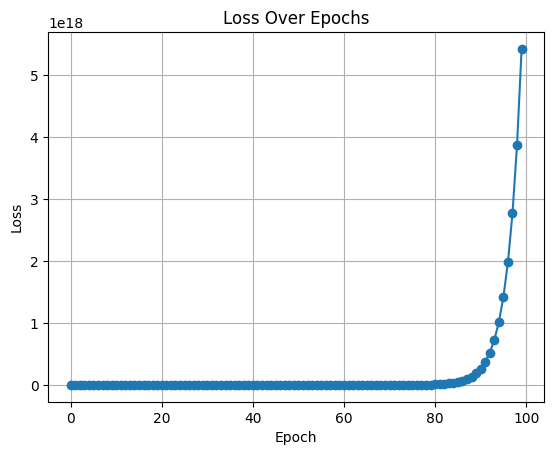

In [26]:
exp_1_model = Model()
exp_1_model.add(NetworkLayer(3,1))
exp_1_model.fit(X_train,y_train.reshape(-1,1))
loss_values = exp_1_model.train(100,0.00004, is_print=True)
plot_loss_graph(loss_values)

In [39]:
import tqdm
n_training_times = 50
test_losses = []
for n in tqdm.tqdm(range(n_training_times)):
    exp_1_model = Model()
    exp_1_model.add(NetworkLayer(3,1))
    exp_1_model.fit(X_train,y_train.reshape(-1,1))
    exp_1_model.train(1000,0.00001, is_print=False)

    y_hat = exp_1_model.predict(X_test)
    test_losses.append(np.sum(np.square(y_hat-y_test.reshape(-1,1)))/len(y_test))

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:02<00:00, 20.66it/s]


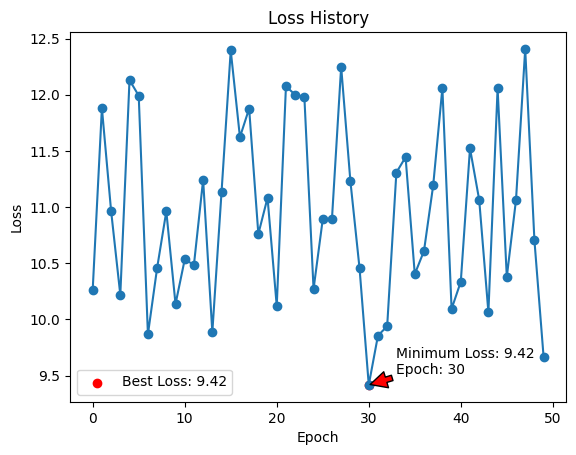

In [40]:
import matplotlib.pyplot as plt

def draw_graph(loss_history):
    best_epoch = loss_history.index(min(loss_history))
    best_loss = min(loss_history)

    # Create a plot
    plt.plot(loss_history, marker='o', linestyle='-')
    plt.title("Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    # Mark the best minimum point
    plt.scatter(best_epoch, best_loss, c='red', label=f"Best Loss: {best_loss:.2f}")
    plt.legend()

    # Annotate the best minimum point with text
    plt.annotate(f"Minimum Loss: {best_loss:.2f}\nEpoch: {best_epoch}",
                xy=(best_epoch, best_loss),
                xytext=(best_epoch + 3, best_loss + 0.1),
                arrowprops=dict(facecolor='red', shrink=0.05))

    plt.show()
draw_graph(test_losses)

### **Experiment 2: Use one hidden layer**

In [41]:
import tqdm
n_training_times = 50
test_losses = []
for n in tqdm.tqdm(range(n_training_times)):
    exp_1_model = Model()
    exp_1_model.add(NetworkLayer(3,2,activation="RELU"))
    exp_1_model.add(NetworkLayer(2,1))
    exp_1_model.fit(X_train,y_train.reshape(-1,1))
    exp_1_model.train(1000,0.00001, is_print=False)

    y_hat = exp_1_model.predict(X_test)
    test_losses.append(np.sum(np.square(y_hat-y_test.reshape(-1,1)))/len(y_test))

100%|██████████| 50/50 [00:04<00:00, 10.82it/s]


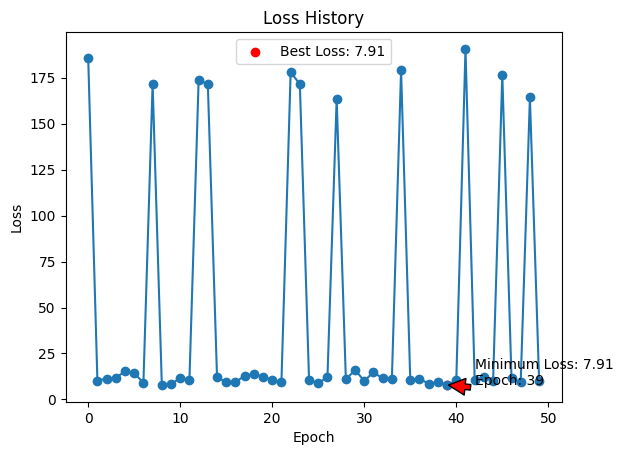

In [42]:
draw_graph(test_losses)

In [33]:
import tqdm
n_training_times = 50
test_losses = []
for n in tqdm.tqdm(range(n_training_times)):
    exp_1_model = Model()
    exp_1_model.add(NetworkLayer(3,2,activation="RELU"))
    exp_1_model.add(NetworkLayer(2,2,activation="RELU"))
    exp_1_model.add(NetworkLayer(2,1))
    exp_1_model.fit(X_train,y_train.reshape(-1,1))
    exp_1_model.train(1000,0.0001, is_print=False)

    y_hat = exp_1_model.predict(X_test)
    test_losses.append(np.sum(np.square(y_hat-y_test.reshape(-1,1)))/len(y_test))

100%|██████████| 50/50 [00:06<00:00,  7.39it/s]


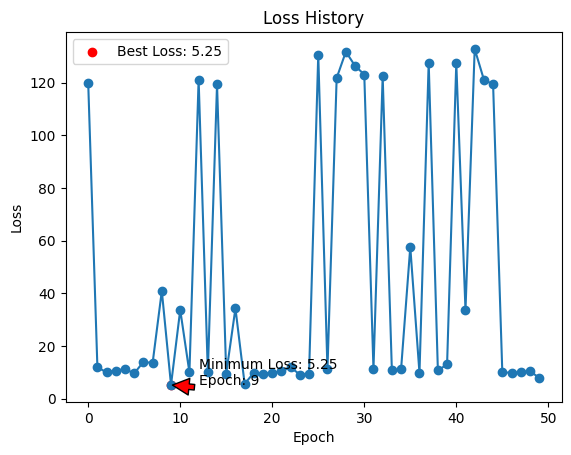

In [34]:
draw_graph(test_losses)

In [43]:
import tqdm
n_training_times = 50
test_losses = []
for n in tqdm.tqdm(range(n_training_times)):
    exp_1_model = Model()
    exp_1_model.add(NetworkLayer(3,3,activation="RELU"))
    exp_1_model.add(NetworkLayer(3,2,activation="RELU"))
    exp_1_model.add(NetworkLayer(2,2,activation="RELU"))
    exp_1_model.add(NetworkLayer(2,1))
    exp_1_model.fit(X_train,y_train.reshape(-1,1))
    exp_1_model.train(1000,0.0001, is_print=False)

    y_hat = exp_1_model.predict(X_test)
    test_losses.append(np.sum(np.square(y_hat-y_test.reshape(-1,1)))/len(y_test))

100%|██████████| 50/50 [00:08<00:00,  6.15it/s]


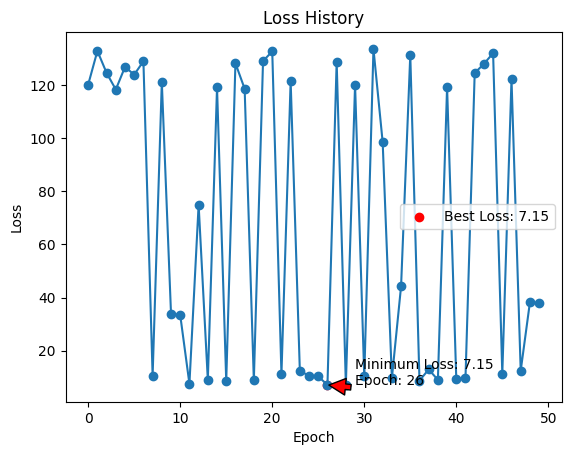

In [44]:
draw_graph(test_losses)

### **Apply Train/dev/test set**
60-20-20

In [11]:
## Load data: 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

data = np.genfromtxt('../advertising/advertising.csv',dtype="float64",delimiter=',')
X_train, X_test, y_train, y_test = train_test_split(data[:,:3], data[:,3], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(10, 3) (4, 3) (4, 3)
(10,) (4,) (4,)


In [109]:
class Model_with_dev:
    def __init__(self):
        """
        Initialize a neural network model.

        """
        self.layers = []
    def add(self, layer):
        """
        Add a network layer to the model.

        Parameters:
        layer (NetworkLayer): The layer to be added to the model.

        """
        self.layers.append(layer)
    def fit(self, X_train, y_train, X_val, y_val ):
        """
        Set the training data and expected results for the model.

        Parameters:
        X_train (numpy.ndarray): Input training data.
        y_train (numpy.ndarray): Expected results for the training data.
        X_val (numpy.ndarray): Input dev/val data.
        y_val(numpy.ndarray): Expected results for the validtion data.

        """
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
    def predict(self, input, is_validation = False):
        output = input
        for i in range(len(self.layers)):
            output = self.layers[i].forward(output,is_validation)
        return output
    def train(self, epoch, learningRate, is_print = True):
        """
        Train the model using the specified number of epochs and learning rate.

        Parameters:
        epoch (int): Number of training epochs.
        learningRate (float): Learning rate for weight and bias updates.

        """
        training_losses = []
        valid_losses = []
        for j in range(epoch):
            d_loss = 0
            
            pred_train = self.predict(self.X_train)
            training_loss = np.sum(np.square(pred_train - self.y_train)) /len(self.X_train)

            pred_val = self.predict(self.X_val, is_validation=True)
            valid_loss = np.sum(np.square(pred_val - self.y_val)) / len(self.X_val)
            
            d_loss = (pred_train - self.y_train) * 2 * (1 / len(self.X_train))
            for i in reversed(range(len(self.layers))):
                d_loss = self.layers[i].backward(d_loss, learningRate)
            if is_print:
                print("Epoch",j+1,"Loss: ",training_loss)
                print("Epoch",j+1,"Valid loss: ",valid_loss)
                print("--------")
            training_losses.append(training_loss)
            valid_losses.append(valid_loss)
        return training_losses, valid_losses

In [ ]:
import numpy as np

class NetworkLayer:
    def __init__(self, numberOfInput, numberOfOutput, activation = None):
        """
        Initialize a network layer with random weights and bias.

        Parameters:
        numberOfInput (int): Number of input neurons of the layer.
        numberOfOutput (int): Number of output neurons of the layer.
        activation (str): Activation function of the layer (e.g., "RELU" for Rectified Linear Unit). Default is None.

        """
        self.weights = np.random.rand(numberOfInput,numberOfOutput) - 0.5
        self.bias = np.random.rand(1,numberOfOutput) - 0.5
        self.activation = activation

    def forward(self,priorForward, is_validation = False):
        """
        Perform a forward pass through the network layer.
        Consider the condition whether the step is validation or not? If validation, the parameter will not be updated. 

        Parameters:
        priorForward (numpy.ndarray): Input data for the layer.
        is_validation (bool): option whether the model is saved the parameter.

        Returns:
        numpy.ndarray: Output result to be passed to the next layer.

        """
        if is_validation == False:
            self.input = priorForward
            self.linear = np.dot(priorForward,self.weights) + self.bias

            if self.activation == "RELU":
                output = np.maximum(0,self.linear)
            else:
                output = self.linear
        else:
            linear = np.dot(priorForward,self.weights) + self.bias
            if self.activation == "RELU":
                output = np.maximum(0,linear)
            else:
                output = linear
        return output


    def backward(self, prior_d_loss,learningRate):
        """
        Perform a backward pass to update weights and bias and compute the loss output to pass to the previous layer.

        Parameters:
        priorLoss (numpy.ndarray): Input data for the layer.
        learningRate (float): Learning rate for weight and bias updates.

        Returns:
        numpy.ndarray: Loss gradient to be passed to the previous layer.

        """
        if self.activation == "RELU":
            prior_d_loss = prior_d_loss * ((self.linear > 0).astype(float))
        self.weights -= (np.dot(self.input.T ,prior_d_loss) * learningRate)
        self.bias -= (np.sum(prior_d_loss)* learningRate)

        return np.dot(prior_d_loss,self.weights.T)

In [110]:
exp_1_model = Model_with_dev()
exp_1_model.add(NetworkLayer(3,1))
exp_1_model.fit(X_train,y_train.reshape(-1,1), 
                X_val,y_val.reshape(-1,1))
history = exp_1_model.train(1000,0.00001, is_print=False)



In [111]:
import matplotlib.pyplot as plt

def plot_train_val_loss(history):
    # Assuming you have obtained the training_loss and validation_loss lists
    # from the train method in your Model class

    # Example usage:
    # model = ... (create and configure your model)
    # training_loss, validation_loss = model.train(epochs, learning_rate, validation_data, validation_expected_results, validation_interval)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(history[0], label='Training Loss', marker='o')
    plt.plot(history[1], label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

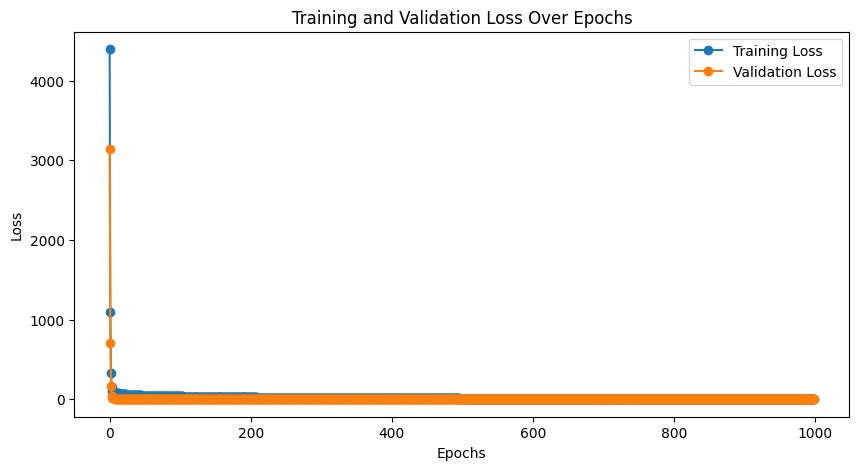

In [112]:
plot_train_val_loss(history)

In [93]:
exp_2_model = Model_with_dev()
exp_2_model.add(NetworkLayer(3,2,activation="RELU"))
exp_2_model.add(NetworkLayer(2,2,activation="RELU"))
exp_2_model.add(NetworkLayer(2,2,activation="RELU"))
exp_2_model.add(NetworkLayer(2,2,activation="RELU"))
exp_2_model.add(NetworkLayer(2,1))
exp_2_model.fit(X_train,y_train.reshape(-1,1), 
                X_val,y_val.reshape(-1,1))
history_2 = exp_2_model.train(1000,0.0001, is_print=False)


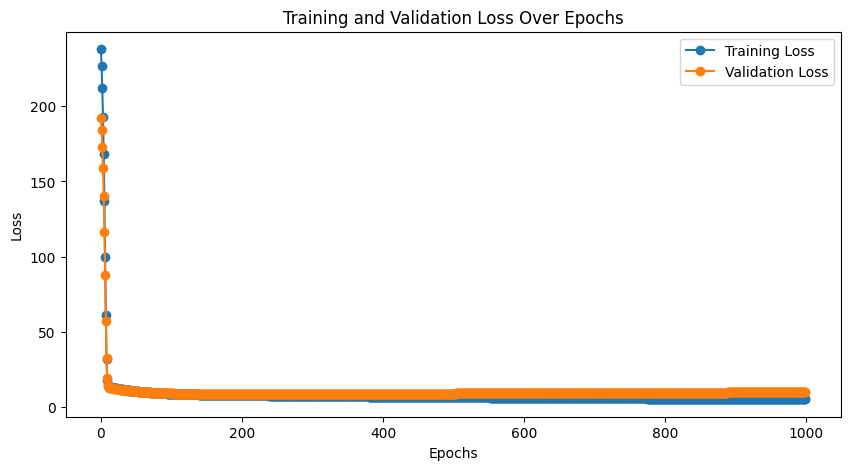

In [94]:
plot_train_val_loss(history_2)

### **K Fold Cross Validation**

In [113]:
data = np.genfromtxt('../advertising/advertising.csv',dtype="float64",delimiter=',')
X_train, X_test, y_train, y_test = train_test_split(data[:,:3], data[:,3], test_size=0.2, random_state=42)

In [114]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=None, shuffle=False)
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={val_index}")

Fold 0:
  Train: index=[ 3  4  5  6  7  8  9 10 11 12 13]
  Test:  index=[0 1 2]
Fold 1:
  Train: index=[ 0  1  2  6  7  8  9 10 11 12 13]
  Test:  index=[3 4 5]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  9 10 11 12 13]
  Test:  index=[6 7 8]
Fold 3:
  Train: index=[ 0  1  2  3  4  5  6  7  8 12 13]
  Test:  index=[ 9 10 11]
Fold 4:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11]
  Test:  index=[12 13]


In [116]:
# Initialize the model
best_model = Model_with_dev()
temp_val_loss = np.nan

for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    temp_model = Model_with_dev()
    temp_model.add(NetworkLayer(3,1))

    temp_model.fit(X_train[train_index],y_train[train_index].reshape(-1,1), 
                    X_train[val_index],y_train[val_index].reshape(-1,1))
    history = temp_model.train(1000,0.00001, is_print=False)

    # Get the best model by the validation loss
    if temp_val_loss < history[1][-1]:
        best_model.layers = temp_model.layers
    print(f"Loss of {i} th model is",history[1][-1])

best_model

Loss of 0 th model is 19.96657560921231
Loss of 1 th model is 5.6210726260988055
Loss of 2 th model is 7.083254391247905
Loss of 3 th model is 15.608118476557031
Loss of 4 th model is 5.681052170116335
